In [1]:
# Import required packages
require(data.table) # To read and write data
require(ggplot2)    # To plot
require(viridis)    # For viridis colormaps

Loading required package: data.table

Loading required package: ggplot2

Loading required package: viridis

Loading required package: viridisLite



In [2]:
# Read table and rename columns (if the first row is not a header)
dfe = fread("../data/delta_free_energy.seq_hybrid.tsv", col.names = c("A", "B", "E"))

In [3]:
# Print the first few rows to inspect the data
head(dfe)

A,B,E
<int>,<int>,<dbl>
1,1,-37.074276
1,2,-7.320365
1,3,-6.750825
1,4,-7.316880
1,5,-6.750825
1,6,-8.704690


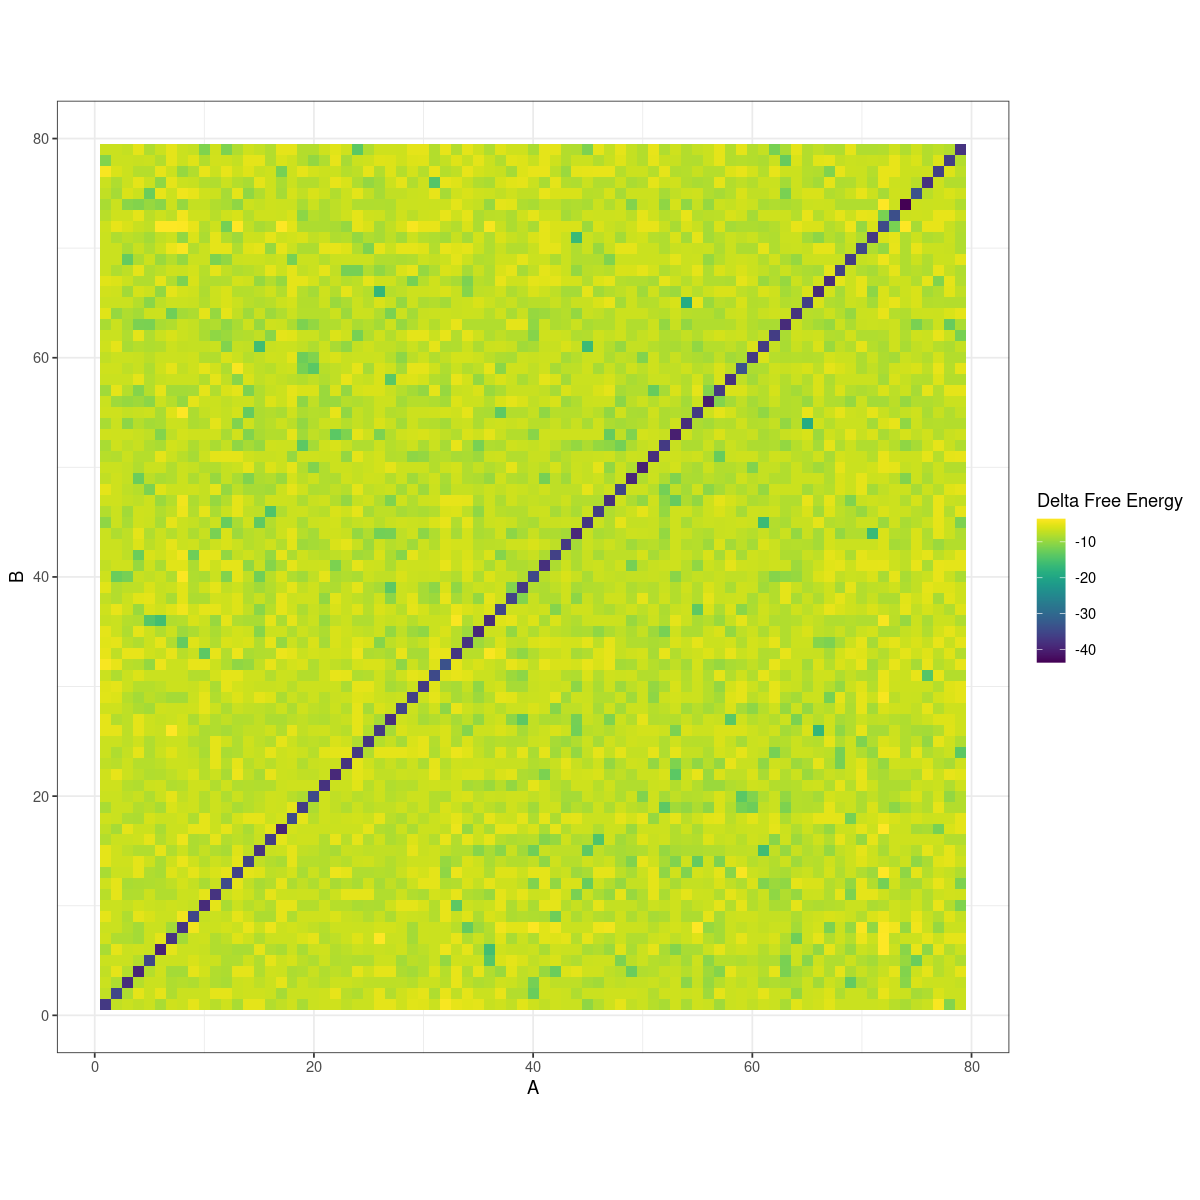

In [4]:
options(repr.plot.width=10, repr.plot.height=10)
# Heatmap
ggplot(dfe, aes(x=A, y=B, fill=E)) + geom_tile() +  # Default data binding and upper triangle heatmap
    geom_tile(data=dfe[, .(B=A, A=B, E=E)]) +       # Lower triangle
    coord_fixed() +                                 # Force the plot to a square
    scale_fill_viridis() +                          # Apply viridis colorspace
    labs(fill="Delta Free Energy") +                # Relabel colorspace
    theme_bw()                                      # Change plot style

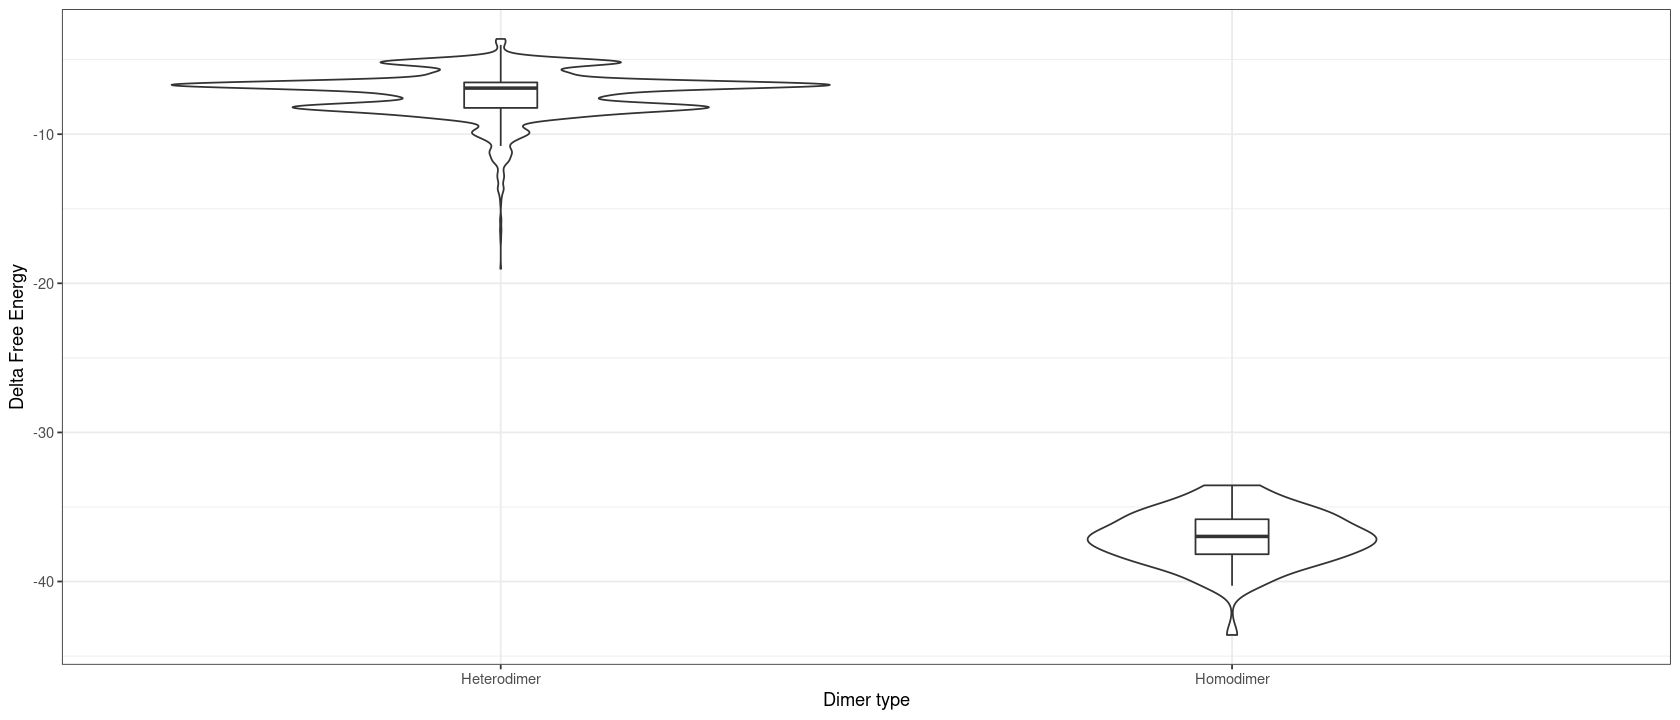

In [5]:
options(repr.plot.width=14, repr.plot.height=6)
pdata = dfe[, .(A, B, dimer_type=ifelse(A==B, "Homodimer", "Heterodimer"), E)]  # New data for plotting
ggplot(pdata, aes(x=dimer_type, y=E)) +                                         # Default data binding
    geom_violin(trim=T) +                                                       # Add trimmed violins
    geom_boxplot(width=.1, outlier.shape=NA) +                                  # Tiny boxes
    labs(x="Dimer type", y="Delta Free Energy") +                               # Relabel axes
    theme_bw()                                                                  # Re-style plot